# Our First ML Program

First, let's load pizzas and reservations from `pizza.txt`:

In [48]:
# video https://app.pluralsight.com/course-player?clipId=43702a8d-6b59-49f2-a67b-320dfc2aa58e
# Module 3, Seciton Making Sense of Our Data at minute 2:00
# skiprows = 1 means we will skip the 1st row as it is the header
# unpack = True means we unpack the data into 2 separate columns
# X, Y = means we are going to assign data in the 1st column from text file to X and the 2nd to Y
# Both X and Y are array

import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

These are the reservations...

In [49]:
# X is the reservations data
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

...and these are the pizzas:

In [50]:
# Y is the number of pizzas
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 29., 15., 15.,
       32., 37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27.,
       37., 17., 18., 23.])

Let's plot pizzas and reservations with Matplotlib:

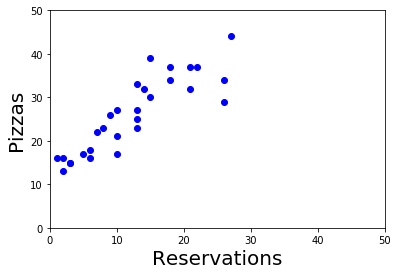

In [46]:
# This directive tells Jupyter to draw matplotlib plots inside the web page:
%matplotlib inline

import matplotlib.pyplot as plt
plt.xlabel("Reservations", fontsize=20)  # Print the X label
plt.ylabel("Pizzas", fontsize=20)        # Print the Y label
plt.axis([0, 50, 0, 50])                 # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                     # Plot the data as blue circles (that's what "bo" stands for)
plt.show()                               # Visualize the diagram

We're about to approximate these data with linear regression–that is, with a line.

The equation of a line is `y = x * w + b`. Translate it to code, and you get the `predict()` function:

In [11]:
def predict(X, w, b):
    return X * w + b

Let's say that we already found a line that approximates the points, and this line has `w = 2.1` and `b = 7.3`. How many pizzas should we expect to sell if we got 10 reservations? Here's the answer:

In [12]:
predict(14, 1.2, 12)

28.8

Note that we can pass an entire NumPy array to `predict()` instead of a single number. NumPy automatically applies the multiplication and the sum inside `predict()` to all the elements in the array:

In [13]:
X = np.array([14, 5, 7])
predict(X, 1.2, 12)

array([28.8, 18. , 20.4])

Before we implement training, we have to define a loss function–a measure of how wrong a line is at approximating the dataset. We'll use the “mean squared error” formula for the loss. This function takes the dataset (`X` and `Y`) and a line (`w` and `b`):

In [14]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

Let's try it out with the data from `pizza.txt` and two made-up values for the line's parameters:

In [15]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [16]:
loss(X, Y, 1.2, 12)

23.778666666666677

Now here's the all-important `train()` function. It takes a dataset, and it returns a line that approximates it. It also takes a number of iterations and a learning rate (`lr`):

In [17]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b

    raise Exception("Couldn't find a result within %d iterations" % iterations)

We have everything we need to find a line that approximates our `pizza.txt` dataset:

In [18]:
w, b = train(X, Y, 10000, 0.01)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

Iteration 1042 => Loss: 29.682220
Iteration 1043 => Loss: 29.654253
Iteration 1044 => Loss: 29.626487
Iteration 1045 => Loss: 29.598920
Iteration 1046 => Loss: 29.571553
Iteration 1047 => Loss: 29.544387
Iteration 1048 => Loss: 29.517420
Iteration 1049 => Loss: 29.490653
Iteration 1050 => Loss: 29.464087
Iteration 1051 => Loss: 29.437720
Iteration 1052 => Loss: 29.411553
Iteration 1053 => Loss: 29.385587
Iteration 1054 => Loss: 29.359820
Iteration 1055 => Loss: 29.334253
Iteration 1056 => Loss: 29.308887
Iteration 1057 => Loss: 29.283720
Iteration 1058 => Loss: 29.258753
Iteration 1059 => Loss: 29.258447
Iteration 1060 => Loss: 29.231147
Iteration 1061 => Loss: 29.204047
Iteration 1062 => Loss: 29.177147
Iteration 1063 => Loss: 29.150447
Iteration 1064 => Loss: 29.123947
Iteration 1065 => Loss: 29.097647
Iteration 1066 => Loss: 29.071547
Iteration 1067 => Loss: 29.045647
Iteration 1068 => Loss: 29.019947
Iteration 1069 => Loss: 28.994447
Iteration 1070 => Loss: 28.969147
Iteration 1071

Done! Here are the line's parameters:

In [19]:
w

1.1000000000000008

In [20]:
b

12.929999999999769

Here is the line visualized over the examples:

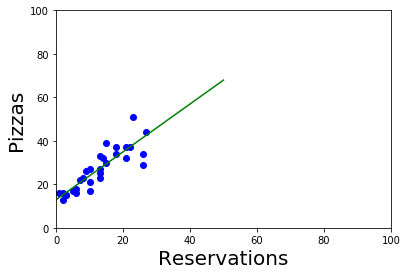

In [23]:
# Plot the examples like we did before:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 100, 0, 100])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b, predict(50, w, b)], color="g")

# Visualize the diagram:
plt.show()

Finally, let's use this model to predict how many pizzas we're going to sell if we got 42 reservations:

In [24]:
reservations = 42
predict(reservations, w, b)

59.1299999999998

So we should prepare enough dough for about 60 pizzas. We just built a system that learns!

In [25]:
reservations = 52
predict(reservations, w, b)

70.12999999999981

In [26]:
reservations = 80
predict(reservations, w, b)

100.92999999999982